# 1. Import the data

In [27]:
# Import pandas package
import pandas as pd

# Read the data from CSV file
df = pd.read_csv('BTC-USD.csv', index_col=0)
df = df.fillna(method='ffill')
df.index = pd.to_datetime(df.index)

# Store the trading day in the day column of the dataframe df
df['day'] = df.index.strftime('%A')

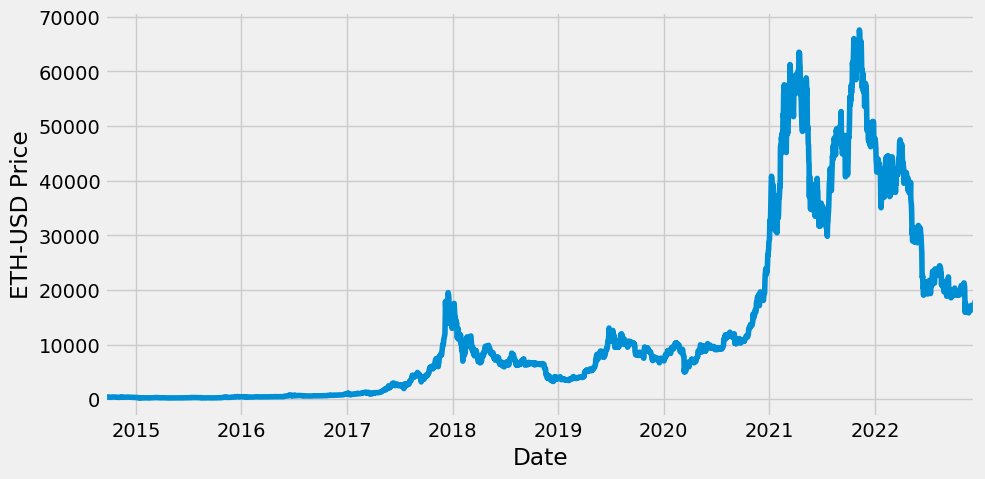

In [28]:
# Import the matplotlib package and set the graph styles
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 5))
df.Close.plot()
plt.ylabel('BTC-USD Price')
plt.show()

# 2. Compute the Percent Change

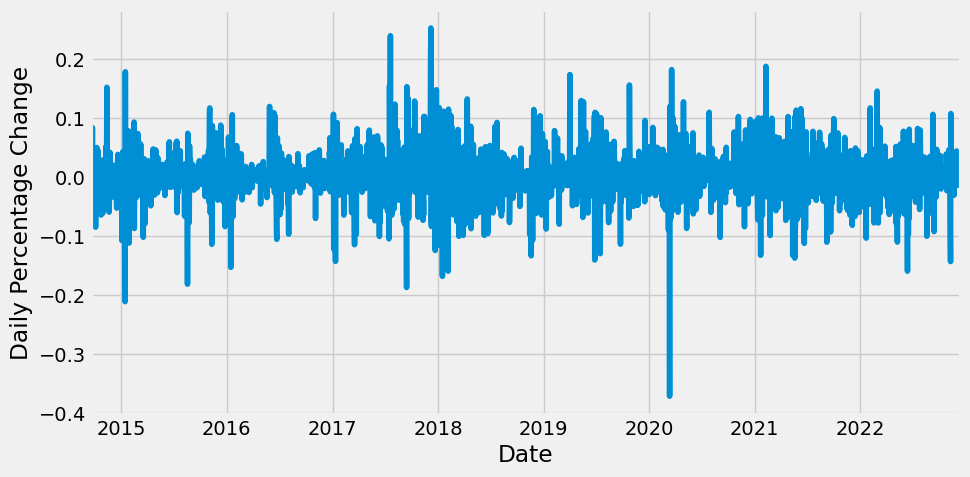

In [29]:
# Compute and plot the percent change
df['pct'] = df['Close'].pct_change()
plt.figure(figsize=(10, 5))
df.pct.plot()
plt.ylabel('Daily Percentage Change')
plt.show()

# 3. The day wise Sharpe ratio

In [30]:
# Import numpy package
import numpy as np

def calc_sharpe(df):
    # Caluclate the day wise returns
    day_wise_returns = df.groupby(df.day).pct

    # Return the day wise Sharpe
    return (np.sqrt(252)*day_wise_returns.mean()/day_wise_returns.std())

# Day wise Sharpe computed on full dataset
calc_sharpe(df)

day
Friday       0.920067
Monday       2.069909
Saturday     1.167500
Sunday       0.057370
Thursday     0.447169
Tuesday      0.278427
Wednesday    0.733103
Name: pct, dtype: float64

# 4. Generate signal

In [31]:
# Initialize the signal column to NaN (Not a number)
df['signal'] = np.nan

# Initialize the highest day variable
highest_day = ''

# Set the iterating variable of while loop to 61 as we need at least 60 days of data to determine the day on which the Sharpe ratio is highest.
i = 61
while i < len(df):

    # After every 14 days (i%14==0), calculate the day wise Sharpe ratio for the past 60 days
    if i % 14 == 0:
        sharpe = calc_sharpe(df[i-61:i-1])

        # Determine the day on which the Sharpe ratio is the highest.
        highest_day = sharpe.idxmax()

    # Set the signal to 1 when the day is equal to highest_day and 0 otherwise.
    df.loc[df.index[i], 'signal'] = np.where(
        df.day.iloc[i] == highest_day, 1, 0)

    # Increment the iterating variable (i)
    i = i+1

# Print the last 5 rows of the dataframe df
df.tail()

,Open,High,Low,Close,Adj Close,Volume,day,pct,signal
Date,,,,,,,,,
2022-12-10,17134.220703,17216.826172,17120.683594,17128.724609,17128.724609,12706781969,Saturday,-0.000258,0.0
2022-12-11,17129.710938,17245.634766,17091.820313,17104.193359,17104.193359,14122486832,Sunday,-0.001432,0.0
2022-12-12,17102.500000,17212.564453,16899.394531,17206.437500,17206.437500,19617581341,Monday,0.005978,0.0
2022-12-13,17206.441406,17930.085938,17111.763672,17781.318359,17781.318359,26634741631,Tuesday,0.033411,0.0
2022-12-14,17793.974609,18127.285156,17756.083984,18101.679688,18101.679688,19507806208,Wednesday,0.018017,0.0


# 5. Strategy returns

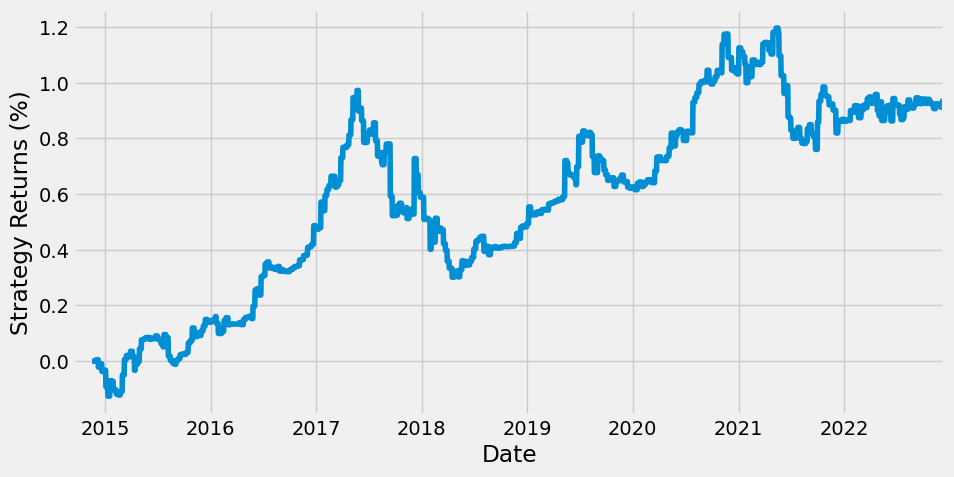

In [32]:
# Compute the strategy returns
strategy_returns = df.signal * df.pct

# Plot the strategy returns
plt.figure(figsize=(10, 5))
plt.ylabel('Strategy Returns (%)')
strategy_returns.cumsum().plot()
plt.show()